### CAPSTONE 2

### Project Overview
A brief description of the project and objectives.

### Problem Statement
- What is the relationship between engine size (L) and the price of sports cars?
- How does the horsepower of different car models influence their 0-60 MPH acceleration time?
- Is there a significant difference in the price of sports cars between different manufacturing years?
- How do torque and horsepower affect the pricing of sports cars in the market?
- Which car brands have the highest and lowest average prices, and how do their specifications compare?

### Dataset Description
- Total Entries: 1007 rows
- Total Columns: 8
1) Car Make
2) Car Model
3) Year
4) Engine Size (L)
5) Horsepower
6) Torque (lb-ft)
7) 0-60 MPH Time (seconds)
8) Price (in USD)

### Step 1: Objectives

We can perform the following analysis

1) Average price by car make 
2) Average price by year
3) Top 10 fastest cars by 0-97 km/h Time
4) Top 10 most powerful cars by Horsepower
5) Price vs Horsepower
6) Engine size vs Horsepower
7) Torque vs Horsepower
8) 0-97 km/h Time vs Horsepower
9) Car brand popularity
10) Car price trends over time (by Year)

# Step 2: Data Collection


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [2]:
# Read data from csv and load it
data = pd.read_csv('Sport car price.csv')
data

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


### Data Overview

In [3]:
data.head(3)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"


In [4]:
data.tail(3)

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"
1006,Rimac,Nevera,2021,Electric Motor,1888,1696,1.85,"2,400,000"


In [5]:
data.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

In [6]:
# count rows 
# count columns 
# data type of each column 
# count not null values in each column 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


# Step 3: Data Cleaning and Reprocessing

In [7]:
# Drop row 170 by index because the year is to far from others

data = data.drop(index=170)
data

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1006 non-null   object
 1   Car Model                1006 non-null   object
 2   Year                     1006 non-null   int64 
 3   Engine Size (L)          996 non-null    object
 4   Horsepower               1006 non-null   object
 5   Torque (lb-ft)           1003 non-null   object
 6   0-60 MPH Time (seconds)  1006 non-null   object
 7   Price (in USD)           1006 non-null   object
dtypes: int64(1), object(7)
memory usage: 70.7+ KB


In [9]:
# Convert to non-object datatype

data['Engine Size (L)'] = pd.to_numeric(data['Engine Size (L)'], errors='coerce')
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors='coerce')
data['Torque (lb-ft)'] = pd.to_numeric(data['Torque (lb-ft)'], errors='coerce')
data['0-60 MPH Time (seconds)'] = pd.to_numeric(data['0-60 MPH Time (seconds)'], errors='coerce')
data['Price (in USD)'] = pd.to_numeric(data['Price (in USD)'].str.replace(',', ''), errors='coerce')  
data

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3.0,379.0,331.0,4.00,101200
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.80,274390
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.00,333750
3,Audi,R8,2022,5.2,562.0,406.0,3.20,142700
4,McLaren,720S,2021,4.0,710.0,568.0,2.70,298000
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5.0,1280.0,1106.0,2.50,3000000
1003,Lotus,Evija,2021,NaN,1972.0,1254.0,2.00,2000000
1004,McLaren,Senna,2021,4.0,789.0,590.0,2.70,1000000
1005,Pagani,Huayra,2021,6.0,764.0,738.0,3.00,2600000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1006 non-null   object 
 1   Car Model                1006 non-null   object 
 2   Year                     1006 non-null   int64  
 3   Engine Size (L)          947 non-null    float64
 4   Horsepower               997 non-null    float64
 5   Torque (lb-ft)           998 non-null    float64
 6   0-60 MPH Time (seconds)  1005 non-null   float64
 7   Price (in USD)           1006 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 70.7+ KB


In [11]:
# Convert 'Torque (lb-ft)' to Nm
data['Torque (Nm)'] = data['Torque (lb-ft)'] * 1.3558179483
# Convert '0-60 MPH Time (seconds)' to 0-97 km/h
data['0-97 km/h Time (seconds)'] = data['0-60 MPH Time (seconds)']
# Convert 'Price (in USD)' to RM
data['Price (in RM)'] = data['Price (in USD)'] * 4.5

data.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD),Torque (Nm),0-97 km/h Time (seconds),Price (in RM)
0,Porsche,911,2022,3.0,379.0,331.0,4.0,101200,448.775741,4.0,455400.0
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.8,274390,600.627351,2.8,1234755.0
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.0,333750,760.613869,3.0,1501875.0
3,Audi,R8,2022,5.2,562.0,406.0,3.2,142700,550.462087,3.2,642150.0
4,McLaren,720S,2021,4.0,710.0,568.0,2.7,298000,770.104595,2.7,1341000.0


In [12]:
# Drop the original 'Torque (lb-ft)', '0-60 MPH', 'Price (in USD)', column
data.drop('Torque (lb-ft)', axis=1, inplace=True)
data.drop('0-60 MPH Time (seconds)', axis=1, inplace=True)
data.drop('Price (in USD)', axis=1, inplace=True)
data

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds),Price (in RM)
0,Porsche,911,2022,3.0,379.0,448.775741,4.00,455400.0
1,Lamborghini,Huracan,2021,5.2,630.0,600.627351,2.80,1234755.0
2,Ferrari,488 GTB,2022,3.9,661.0,760.613869,3.00,1501875.0
3,Audi,R8,2022,5.2,562.0,550.462087,3.20,642150.0
4,McLaren,720S,2021,4.0,710.0,770.104595,2.70,1341000.0
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5.0,1280.0,1499.534651,2.50,13500000.0
1003,Lotus,Evija,2021,NaN,1972.0,1700.195707,2.00,9000000.0
1004,McLaren,Senna,2021,4.0,789.0,799.932589,2.70,4500000.0
1005,Pagani,Huayra,2021,6.0,764.0,1000.593646,3.00,11700000.0


In [13]:
# Remove row with NaN values
data_cleaned = data.dropna()
data_cleaned

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds),Price (in RM)
0,Porsche,911,2022,3.0,379.0,448.775741,4.0,455400.0
1,Lamborghini,Huracan,2021,5.2,630.0,600.627351,2.8,1234755.0
2,Ferrari,488 GTB,2022,3.9,661.0,760.613869,3.0,1501875.0
3,Audi,R8,2022,5.2,562.0,550.462087,3.2,642150.0
4,McLaren,720S,2021,4.0,710.0,770.104595,2.7,1341000.0
...,...,...,...,...,...,...,...,...
1000,Aston Martin,Vantage,2021,4.0,503.0,684.688064,3.6,657000.0
1001,Bugatti,Chiron,2021,8.0,1479.0,1599.865179,2.4,13500000.0
1002,Koenigsegg,Jesko,2022,5.0,1280.0,1499.534651,2.5,13500000.0
1004,McLaren,Senna,2021,4.0,789.0,799.932589,2.7,4500000.0


In [14]:
data.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (Nm)', '0-97 km/h Time (seconds)', 'Price (in RM)'],
      dtype='object')

In [15]:
# Rearranging columns
data = data[['Car Make', 'Car Model', 'Year', 'Price (in RM)', 'Engine Size (L)', 'Horsepower',
       'Torque (Nm)', '0-97 km/h Time (seconds)']]
data

,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
0,Porsche,911,2022,455400.0,3.0,379.0,448.775741,4.00
1,Lamborghini,Huracan,2021,1234755.0,5.2,630.0,600.627351,2.80
2,Ferrari,488 GTB,2022,1501875.0,3.9,661.0,760.613869,3.00
3,Audi,R8,2022,642150.0,5.2,562.0,550.462087,3.20
4,McLaren,720S,2021,1341000.0,4.0,710.0,770.104595,2.70
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,13500000.0,5.0,1280.0,1499.534651,2.50
1003,Lotus,Evija,2021,9000000.0,NaN,1972.0,1700.195707,2.00
1004,McLaren,Senna,2021,4500000.0,4.0,789.0,799.932589,2.70
1005,Pagani,Huayra,2021,11700000.0,6.0,764.0,1000.593646,3.00


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Car Make                  1006 non-null   object 
 1   Car Model                 1006 non-null   object 
 2   Year                      1006 non-null   int64  
 3   Price (in RM)             1006 non-null   float64
 4   Engine Size (L)           947 non-null    float64
 5   Horsepower                997 non-null    float64
 6   Torque (Nm)               998 non-null    float64
 7   0-97 km/h Time (seconds)  1005 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 70.7+ KB


In [17]:
# Fill NaN with EV
data_with_EV = data.fillna('EV')
data_with_EV

,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
0,Porsche,911,2022,455400.0,3.0,379.0,448.775741,4.0
1,Lamborghini,Huracan,2021,1234755.0,5.2,630.0,600.627351,2.8
2,Ferrari,488 GTB,2022,1501875.0,3.9,661.0,760.613869,3.0
3,Audi,R8,2022,642150.0,5.2,562.0,550.462087,3.2
4,McLaren,720S,2021,1341000.0,4.0,710.0,770.104595,2.7
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,13500000.0,5.0,1280.0,1499.534651,2.5
1003,Lotus,Evija,2021,9000000.0,EV,1972.0,1700.195707,2.0
1004,McLaren,Senna,2021,4500000.0,4.0,789.0,799.932589,2.7
1005,Pagani,Huayra,2021,11700000.0,6.0,764.0,1000.593646,3.0


In [18]:
data_with_EV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Car Make                  1006 non-null   object 
 1   Car Model                 1006 non-null   object 
 2   Year                      1006 non-null   int64  
 3   Price (in RM)             1006 non-null   float64
 4   Engine Size (L)           1006 non-null   object 
 5   Horsepower                1006 non-null   object 
 6   Torque (Nm)               1006 non-null   object 
 7   0-97 km/h Time (seconds)  1006 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 70.7+ KB


In [19]:
# Convert data_with_EV to non-object datatype
data_with_EV['Engine Size (L)'] = pd.to_numeric(data['Engine Size (L)'], errors='coerce')
data_with_EV['Horsepower'] = pd.to_numeric(data['Horsepower'], errors='coerce')
data_with_EV['Torque (Nm)'] = pd.to_numeric(data['Torque (Nm)'], errors='coerce')
data_with_EV['0-97 km/h Time (seconds)'] = pd.to_numeric(data['0-97 km/h Time (seconds)'], errors='coerce')
data_with_EV

,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
0,Porsche,911,2022,455400.0,3.0,379.0,448.775741,4.00
1,Lamborghini,Huracan,2021,1234755.0,5.2,630.0,600.627351,2.80
2,Ferrari,488 GTB,2022,1501875.0,3.9,661.0,760.613869,3.00
3,Audi,R8,2022,642150.0,5.2,562.0,550.462087,3.20
4,McLaren,720S,2021,1341000.0,4.0,710.0,770.104595,2.70
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,13500000.0,5.0,1280.0,1499.534651,2.50
1003,Lotus,Evija,2021,9000000.0,NaN,1972.0,1700.195707,2.00
1004,McLaren,Senna,2021,4500000.0,4.0,789.0,799.932589,2.70
1005,Pagani,Huayra,2021,11700000.0,6.0,764.0,1000.593646,3.00


In [20]:
data_with_EV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Car Make                  1006 non-null   object 
 1   Car Model                 1006 non-null   object 
 2   Year                      1006 non-null   int64  
 3   Price (in RM)             1006 non-null   float64
 4   Engine Size (L)           947 non-null    float64
 5   Horsepower                997 non-null    float64
 6   Torque (Nm)               998 non-null    float64
 7   0-97 km/h Time (seconds)  1005 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 70.7+ KB


In [21]:
data_with_EV = data.fillna('EV')
data_with_EV

,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
0,Porsche,911,2022,455400.0,3.0,379.0,448.775741,4.0
1,Lamborghini,Huracan,2021,1234755.0,5.2,630.0,600.627351,2.8
2,Ferrari,488 GTB,2022,1501875.0,3.9,661.0,760.613869,3.0
3,Audi,R8,2022,642150.0,5.2,562.0,550.462087,3.2
4,McLaren,720S,2021,1341000.0,4.0,710.0,770.104595,2.7
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,13500000.0,5.0,1280.0,1499.534651,2.5
1003,Lotus,Evija,2021,9000000.0,EV,1972.0,1700.195707,2.0
1004,McLaren,Senna,2021,4500000.0,4.0,789.0,799.932589,2.7
1005,Pagani,Huayra,2021,11700000.0,6.0,764.0,1000.593646,3.0


In [22]:
# Remove rows where any column contains the string 'EV'
data_without_EV = data.dropna()
data_without_EV


,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
0,Porsche,911,2022,455400.0,3.0,379.0,448.775741,4.0
1,Lamborghini,Huracan,2021,1234755.0,5.2,630.0,600.627351,2.8
2,Ferrari,488 GTB,2022,1501875.0,3.9,661.0,760.613869,3.0
3,Audi,R8,2022,642150.0,5.2,562.0,550.462087,3.2
4,McLaren,720S,2021,1341000.0,4.0,710.0,770.104595,2.7
...,...,...,...,...,...,...,...,...
1000,Aston Martin,Vantage,2021,657000.0,4.0,503.0,684.688064,3.6
1001,Bugatti,Chiron,2021,13500000.0,8.0,1479.0,1599.865179,2.4
1002,Koenigsegg,Jesko,2022,13500000.0,5.0,1280.0,1499.534651,2.5
1004,McLaren,Senna,2021,4500000.0,4.0,789.0,799.932589,2.7


In [23]:
data_without_EV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 945 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Car Make                  945 non-null    object 
 1   Car Model                 945 non-null    object 
 2   Year                      945 non-null    int64  
 3   Price (in RM)             945 non-null    float64
 4   Engine Size (L)           945 non-null    float64
 5   Horsepower                945 non-null    float64
 6   Torque (Nm)               945 non-null    float64
 7   0-97 km/h Time (seconds)  945 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 66.4+ KB


### Outliers Detection and Treatment

In [24]:
# median
median = data['Horsepower'].median()
median

np.float64(591.0)

In [25]:
# first quartile
# 25% of the values in the column are below this value

q1 = data['Horsepower'].quantile(0.25)
q1

np.float64(454.0)

In [26]:
# third quartile
# 75% of the values in the column are below this value

q3 = data['Horsepower'].quantile(0.75)
q3

np.float64(671.0)

In [27]:
# The Interquartile Range (IQR) is calculated as the difference between Q3 and Q1

iqr = q3 - q1
iqr

np.float64(217.0)

In [28]:
# Any value below this will be considered a lower outlier.

iqrmin = q1 - (1.5 * iqr)
iqrmin

np.float64(128.5)

In [29]:
# Any value above this will be considered an upper outlier.

iqrmax = q3 + (1.5 * iqr)
iqrmax

np.float64(996.5)

In [30]:
# since there is no output returned, 
# this means that no records in the dataset meet the condition where Horsepower is less than iqrmin

data[data['Horsepower'] < iqrmin]

,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)


In [31]:
# any horsepower value above 996.5 is considered an upper outlier

data[data['Horsepower'] > iqrmax]

,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
11,Bugatti,Chiron,2021,13500000.0,8.0,1500.0,1599.865179,2.40
14,Koenigsegg,Jesko,2021,12600000.0,5.0,1280.0,1376.155218,2.50
26,Rimac,Nevera,2022,10800000.0,NaN,1914.0,2299.467240,1.85
85,Bugatti,Chiron,2022,13500000.0,8.0,1500.0,1599.865179,2.40
88,Koenigsegg,Jesko,2022,13500000.0,5.0,1600.0,1499.534651,2.50
...,...,...,...,...,...,...,...,...
988,Pininfarina,Battista,2021,11250000.0,NaN,1872.0,2299.467240,1.90
1001,Bugatti,Chiron,2021,13500000.0,8.0,1479.0,1599.865179,2.40
1002,Koenigsegg,Jesko,2022,13500000.0,5.0,1280.0,1499.534651,2.50
1003,Lotus,Evija,2021,9000000.0,NaN,1972.0,1700.195707,2.00


<Axes: xlabel='Horsepower'>

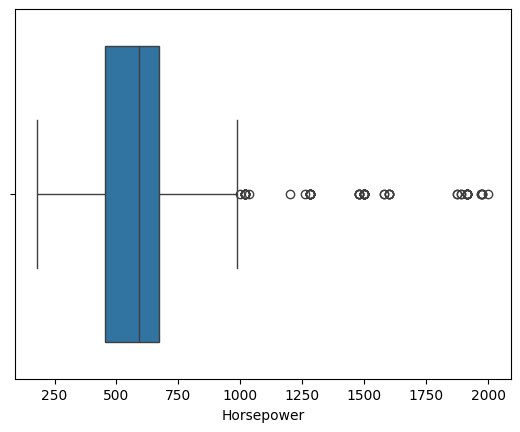

In [32]:
sns.boxplot(x=data['Horsepower'])

**Boxplot summary**

The box represents the range where the middle 50% of the data lies (from the 25th percentile to the 75th percentile). The thick line inside the box shows the median horsepower.
- 25th percentile: 454.0
- 75th percentile: 671.0
- median: 591

# Step 4: Data Analysis

In [33]:
data_with_EV.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1006 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Car Make                  1006 non-null   object 
 1   Car Model                 1006 non-null   object 
 2   Year                      1006 non-null   int64  
 3   Price (in RM)             1006 non-null   float64
 4   Engine Size (L)           1006 non-null   object 
 5   Horsepower                1006 non-null   object 
 6   Torque (Nm)               1006 non-null   object 
 7   0-97 km/h Time (seconds)  1006 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 70.7+ KB


In [34]:
data.describe()

,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
count,1006.000000,1.006000e+03,947.000000,997.000000,998.000000,1005.000000
mean,2021.257455,1.716397e+06,4.393031,627.517553,735.243228,3.514328
std,0.968313,3.322946e+06,1.396974,300.062418,328.934082,0.776443
min,2014.000000,1.125000e+05,0.000000,181.000000,0.000000,1.800000
25%,2021.000000,3.231000e+05,3.500000,454.000000,550.462087,2.900000
50%,2021.000000,6.299775e+05,4.000000,591.000000,690.111336,3.500000
75%,2022.000000,1.122750e+06,5.200000,671.000000,818.914041,4.000000
max,2023.000000,2.340000e+07,8.400000,2000.000000,2348.276686,6.500000


In [35]:
# We want to do statistical analysis by Car Model against Horsepower
# We want to know which Car Model give us a good horsepower

data.groupby('Car Model')['Horsepower'].describe()

,count,mean,std,min,25%,50%,75%,max
Car Model,,,,,,,,
1,1.0,600.0,NaN,600.0,600.0,600.0,600.0,600.0
370Z,9.0,334.0,6.0,332.0,332.0,332.0,332.0,350.0
370Z Coupe,1.0,332.0,NaN,332.0,332.0,332.0,332.0,332.0
370Z Nismo,24.0,350.0,0.0,350.0,350.0,350.0,350.0,350.0
400Z,1.0,400.0,NaN,400.0,400.0,400.0,400.0,400.0
...,...,...,...,...,...,...,...,...
WRX STI,3.0,310.0,0.0,310.0,310.0,310.0,310.0,310.0
Wraith,8.0,624.0,0.0,624.0,624.0,624.0,624.0,624.0
Z4 M40i,2.0,382.0,0.0,382.0,382.0,382.0,382.0,382.0


### Analysis Insights

- 370Z: There are 9 entries for this model, with a mean horsepower of 334. The minimum horsepower is 332, the 50th percentile (median) is 332, and the maximum is 350.
- Wraith: There are 8 entries, with a mean horsepower of 624, and all horsepower values are 624 (since there's no variation, the min, 25%, 50%, 75%, and max are all the same).
- This analysis gives insights into the horsepower distribution for different car models. From this, you can easily identify which models offer higher horsepower or have more variability in their performance.

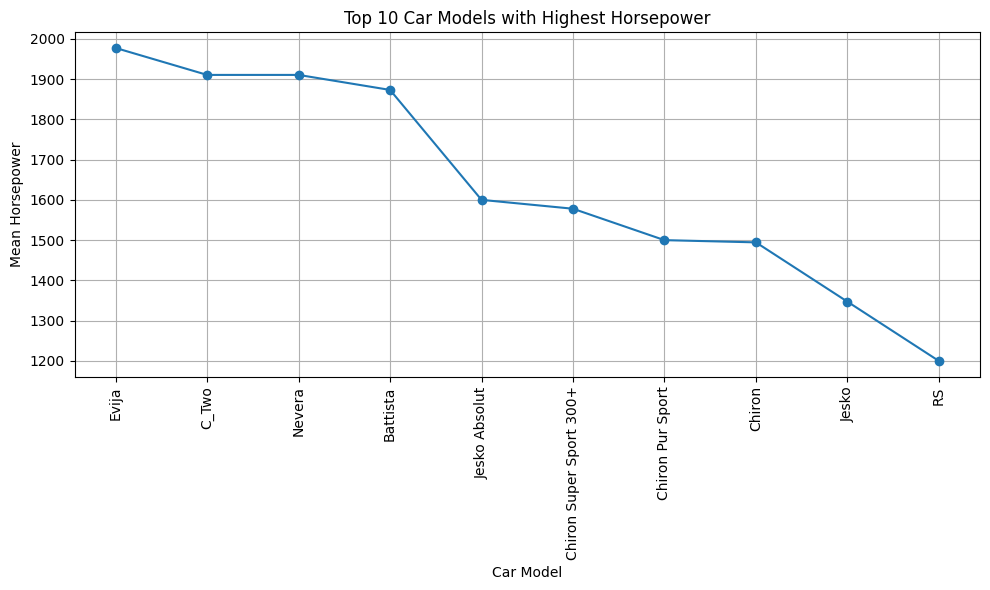

In [36]:
# Convert the 'Horsepower' column to numeric for analysis
data['Horsepower'] = pd.to_numeric(data['Horsepower'], errors='coerce')

# Group by 'Car Model' and describe 'Horsepower', sort by 'mean' and get 
top_10_horsepower = data.groupby('Car Model')['Horsepower'].describe().sort_values(by='mean', ascending=False).head(10)

# Plot the top 10 car models by horsepower
plt.figure(figsize=(10, 6))
plt.plot(top_10_horsepower['mean'], marker='o')
plt.xticks(rotation='vertical')
plt.title('Top 10 Car Models with Highest Horsepower')
plt.xlabel('Car Model')
plt.ylabel('Mean Horsepower')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [37]:
# Let us try to get the columns based on numerical values
data.select_dtypes(include=[np.number]).corr()

,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
Year,1.000000,-0.017215,-0.240668,0.011400,0.035172,0.025116
Price (in RM),-0.017215,1.000000,0.400087,0.798750,0.736880,-0.499604
Engine Size (L),-0.240668,0.400087,1.000000,0.587229,0.606306,-0.354943
Horsepower,0.011400,0.798750,0.587229,1.000000,0.941390,-0.733935
Torque (Nm),0.035172,0.736880,0.606306,0.941390,1.000000,-0.688982
0-97 km/h Time (seconds),0.025116,-0.499604,-0.354943,-0.733935,-0.688982,1.000000


In [38]:
# Correlation matrix
numerical_cols = data.select_dtypes(include=[np.number]).columns
correlations = data[numerical_cols].corr()
correlations

,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
Year,1.000000,-0.017215,-0.240668,0.011400,0.035172,0.025116
Price (in RM),-0.017215,1.000000,0.400087,0.798750,0.736880,-0.499604
Engine Size (L),-0.240668,0.400087,1.000000,0.587229,0.606306,-0.354943
Horsepower,0.011400,0.798750,0.587229,1.000000,0.941390,-0.733935
Torque (Nm),0.035172,0.736880,0.606306,0.941390,1.000000,-0.688982
0-97 km/h Time (seconds),0.025116,-0.499604,-0.354943,-0.733935,-0.688982,1.000000


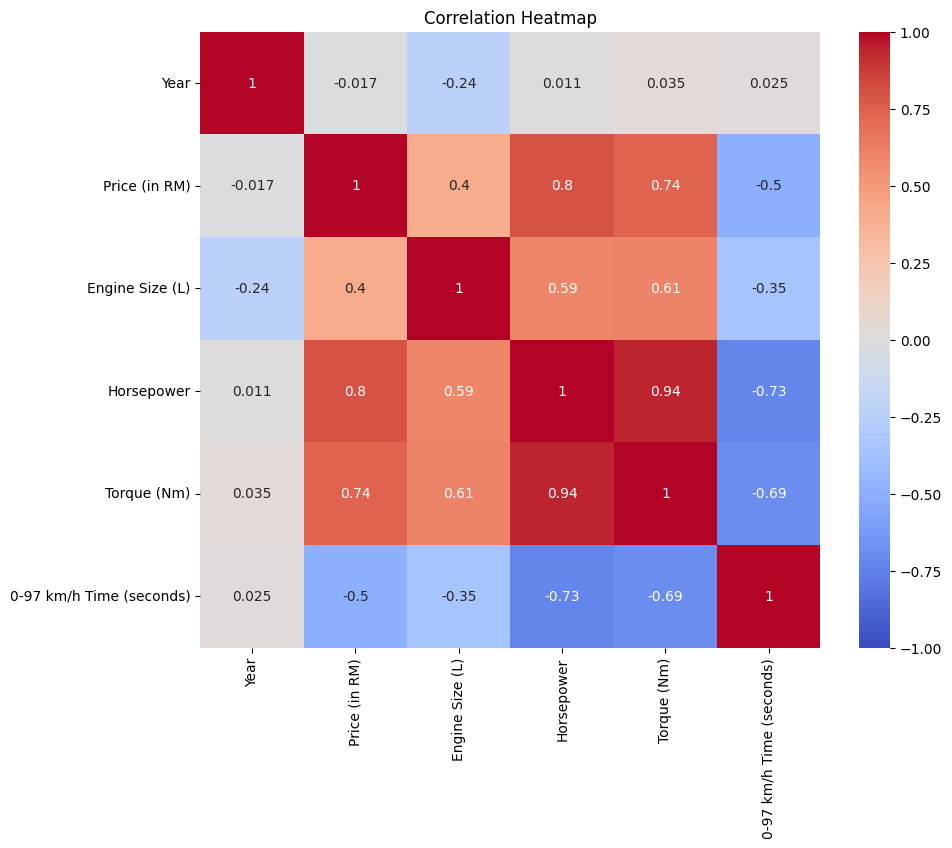

In [39]:
#Correlogram graph based on correlation

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

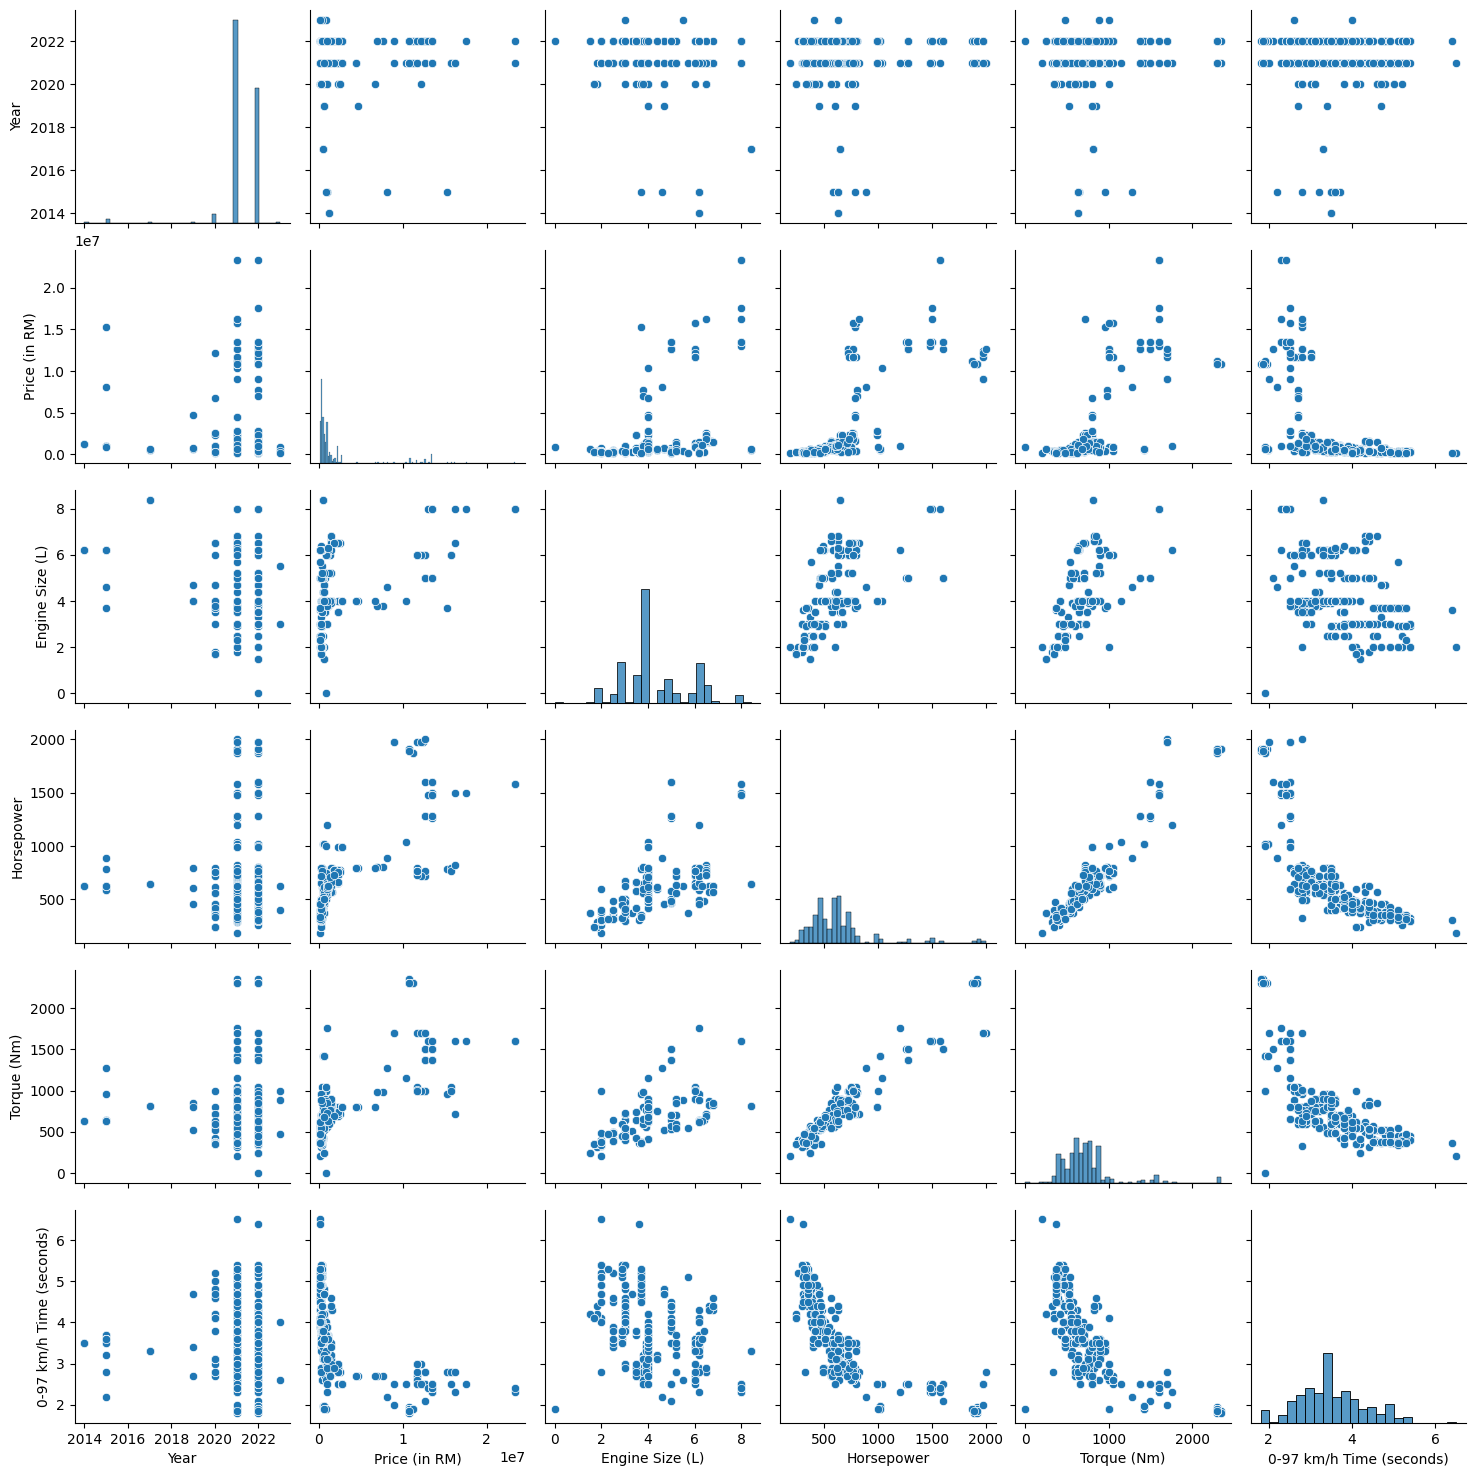

In [40]:
# pairplot

sns.pairplot(data, vars=numerical_cols)

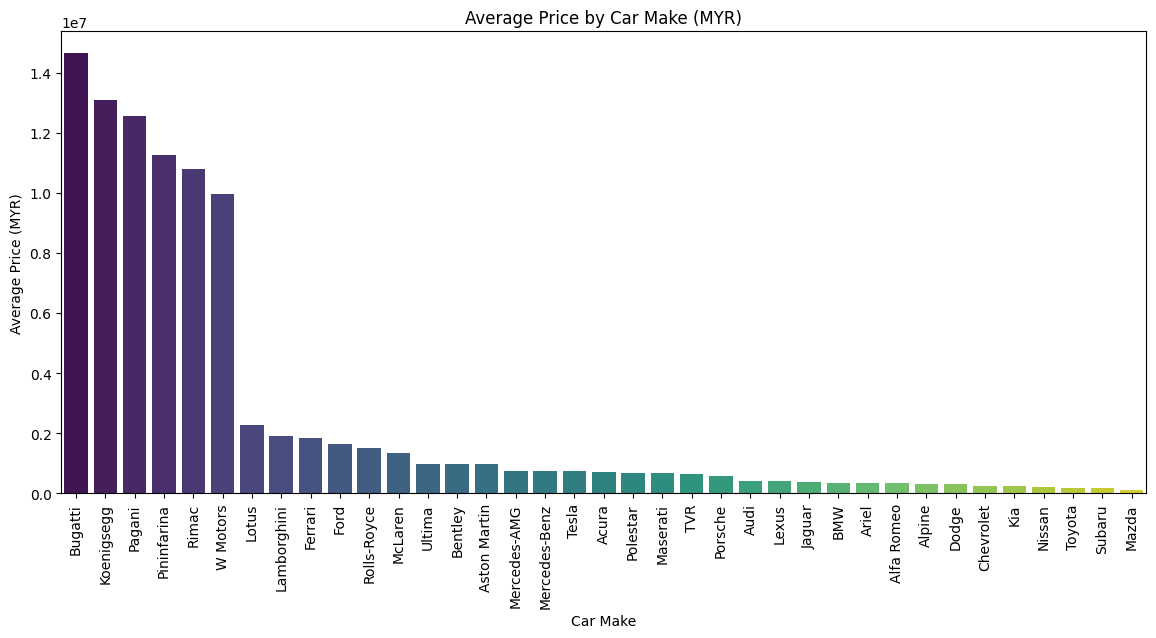

In [41]:
# Grouping by Car Make to find the average price in MYR
avg_price_by_make = data_with_EV.groupby('Car Make')['Price (in RM)'].mean().sort_values(ascending=False)

# Plotting average price by Car Make
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_price_by_make.index, y=avg_price_by_make.values, hue=avg_price_by_make.index, palette='viridis', legend=False)
plt.xticks(rotation=90)
plt.title('Average Price by Car Make (MYR)')
plt.xlabel('Car Make')
plt.ylabel('Average Price (MYR)')
plt.show()

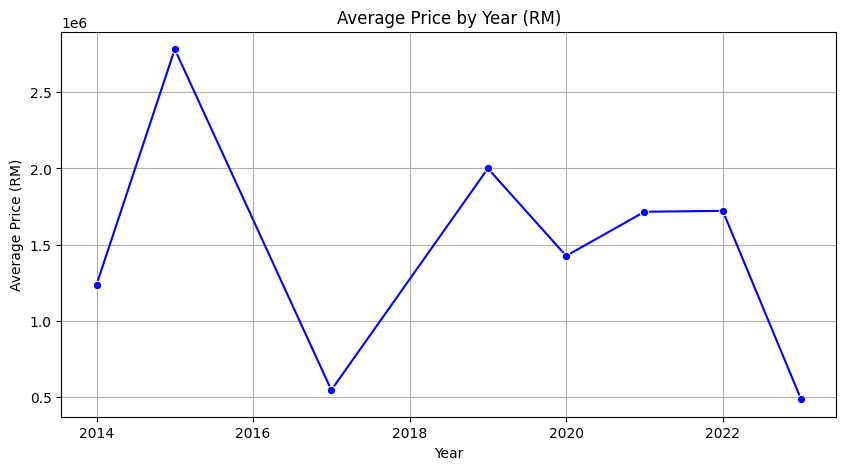

In [42]:
# Grouping by Year to find average price trends
avg_price_by_year = data_with_EV.groupby('Year')['Price (in RM)'].mean()

# Plotting average price by Year
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker='o', color='b')
plt.title('Average Price by Year (RM)')
plt.xlabel('Year')
plt.ylabel('Average Price (RM)')
plt.grid(True)
plt.show()

In [43]:
# Convert '0-97 km/h Time (seconds)' to numeric, invalid parsing will be set as NaN
data_with_EV['0-97 km/h Time (seconds)'] = pd.to_numeric(data_with_EV['0-97 km/h Time (seconds)'], errors='coerce')

# Drop rows with NaN values in '0-97 km/h Time (seconds)' after conversion
valid_fastest_cars = data_with_EV.dropna(subset=['0-97 km/h Time (seconds)']).sort_values(by='0-97 km/h Time (seconds)')

# If fewer than 10 cars are available, display the count and check the data
print(f"Number of cars with valid 0-97 km/h times: {len(valid_fastest_cars)}")
print(valid_fastest_cars[['Car Make', 'Car Model', '0-97 km/h Time (seconds)']].head(10))


Number of cars with valid 0-97 km/h times: 1005
     Car Make      Car Model  0-97 km/h Time (seconds)
387     Rimac          C_Two                      1.80
439     Rimac          C_Two                      1.80
26      Rimac         Nevera                      1.85
1006    Rimac         Nevera                      1.85
824     Rimac         Nevera                      1.85
352     Rimac         Nevera                      1.85
686     Rimac          C_Two                      1.85
278     Rimac          C_Two                      1.85
986     Rimac         Nevera                      1.85
511     Tesla  Model S Plaid                      1.90


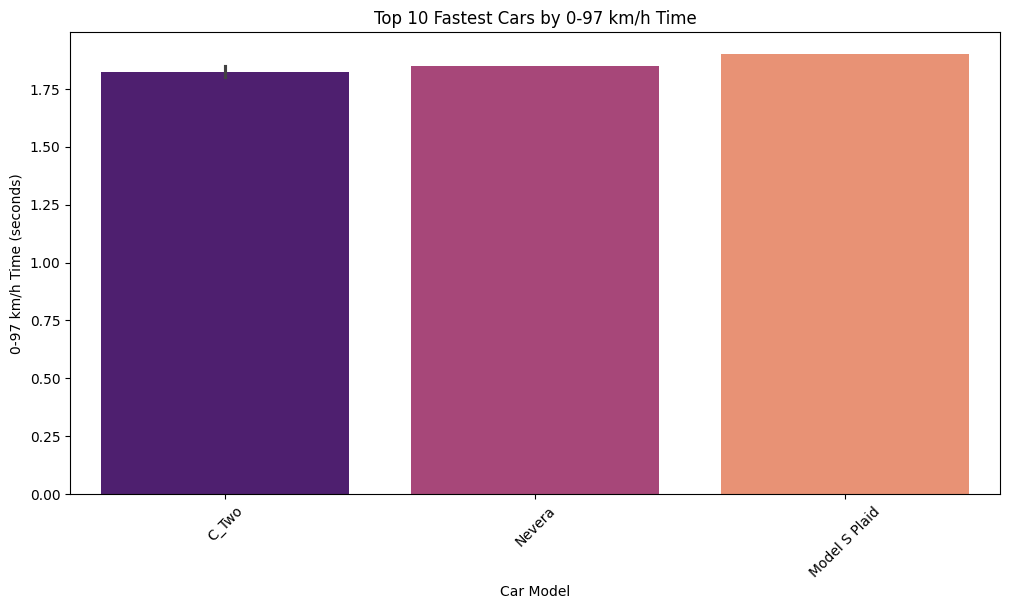

In [44]:
# Plotting top 10 fastest cars by 0-97 km/h Time
top_fastest_cars = valid_fastest_cars.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_fastest_cars, x='Car Model', y='0-97 km/h Time (seconds)', hue='Car Model', dodge=False, palette='magma', legend=False)
plt.title('Top 10 Fastest Cars by 0-97 km/h Time')
plt.xlabel('Car Model')
plt.ylabel('0-97 km/h Time (seconds)')
plt.xticks(rotation=45)
plt.show()

In [45]:
# Get the unique car makes
unique_car_makes = data['Car Make'].nunique()
unique_car_makes


37

In [46]:
# Convert 'Horsepower' column to numeric, invalid parsing will be set as NaN
data_with_EV['Horsepower'] = pd.to_numeric(data_with_EV['Horsepower'], errors='coerce')

# Drop rows with NaN values in 'Horsepower' after conversion
valid_powerful_cars = data_with_EV.dropna(subset=['Horsepower']).sort_values(by='Horsepower', ascending=False)

# If fewer than 10 cars are available, display the count and check the data
print(f"Number of cars with Highest Horsepower: {len(valid_powerful_cars)}")
print(valid_powerful_cars[['Car Make', 'Car Model', 'Horsepower']].head(10))


Number of cars with Highest Horsepower: 997
     Car Make Car Model  Horsepower
877     Lotus     Evija      2000.0
987     Lotus     Evija      1973.0
420     Lotus     Evija      1973.0
523     Lotus     Evija      1973.0
697     Lotus     Evija      1972.0
1003    Lotus     Evija      1972.0
97      Rimac    Nevera      1914.0
686     Rimac     C_Two      1914.0
26      Rimac    Nevera      1914.0
824     Rimac    Nevera      1914.0


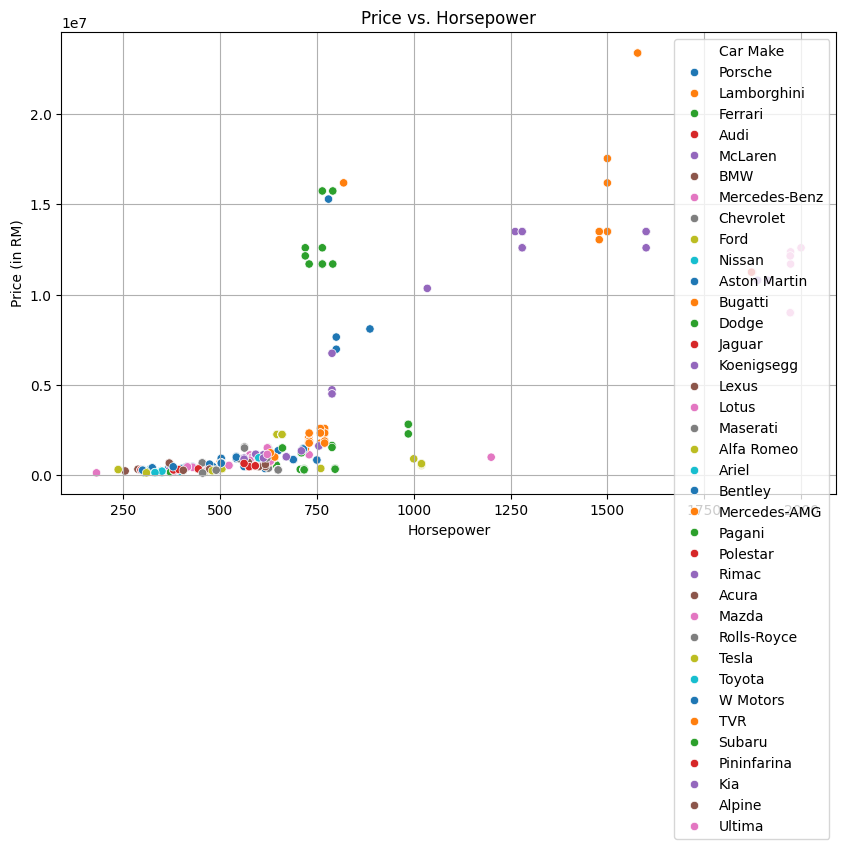

In [47]:
# Scatter plot of Price vs. Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_with_EV, x='Horsepower', y='Price (in RM)', hue='Car Make', palette='tab10')
plt.title('Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price (in RM)')
plt.grid(True)
plt.show()


The plot compares the horsepower of various car makes (x-axis) to their price in Malaysian Ringgit (RM) on the y-axis. Each point on the graph represents a car make, with different colors used to differentiate between them. A legend on the right side of the plot identifies the corresponding car manufacturers like Porsche, Lamborghini, Ferrari, BMW, and others. The plot highlights the relationship between horsepower and car price, showing that cars with higher horsepower tend to have a higher price. The grid enhances the readability of the scatter points.

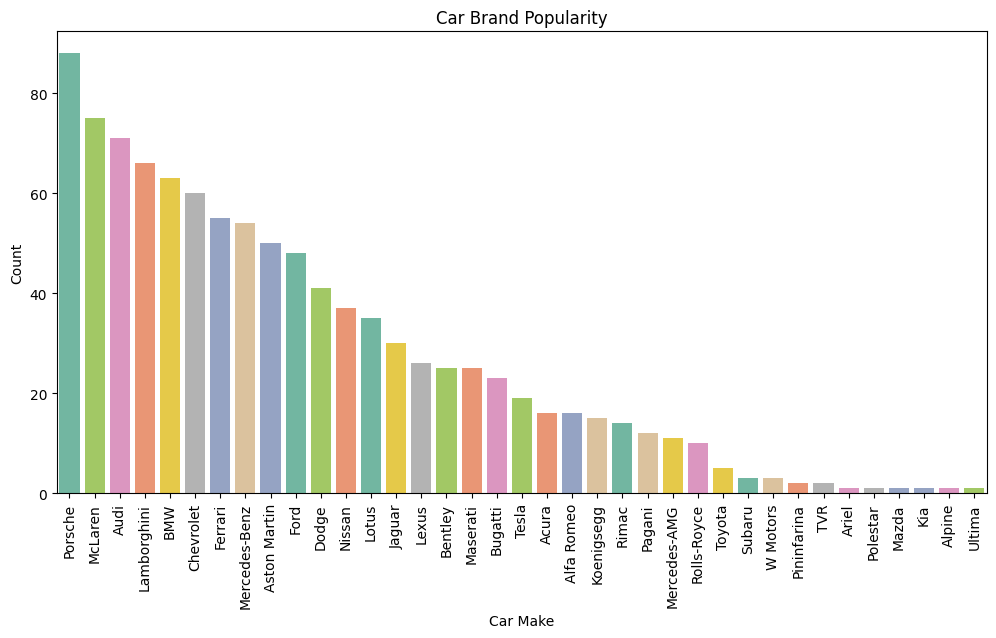

In [48]:
# Count plot showing the distribution of car brands
plt.figure(figsize=(12, 6))
sns.countplot(data=data_with_EV, x='Car Make', hue='Car Make', order=data_with_EV['Car Make'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.title('Car Brand Popularity')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()


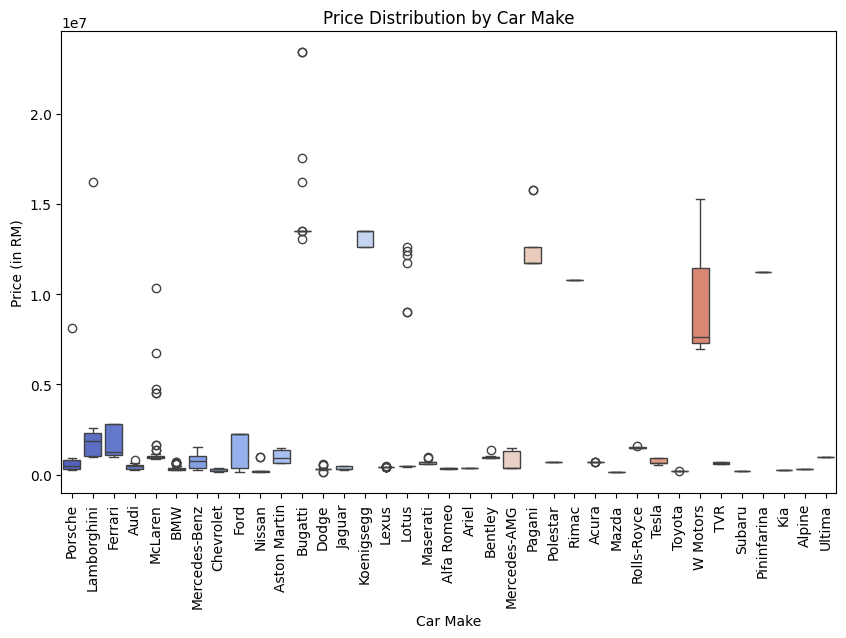

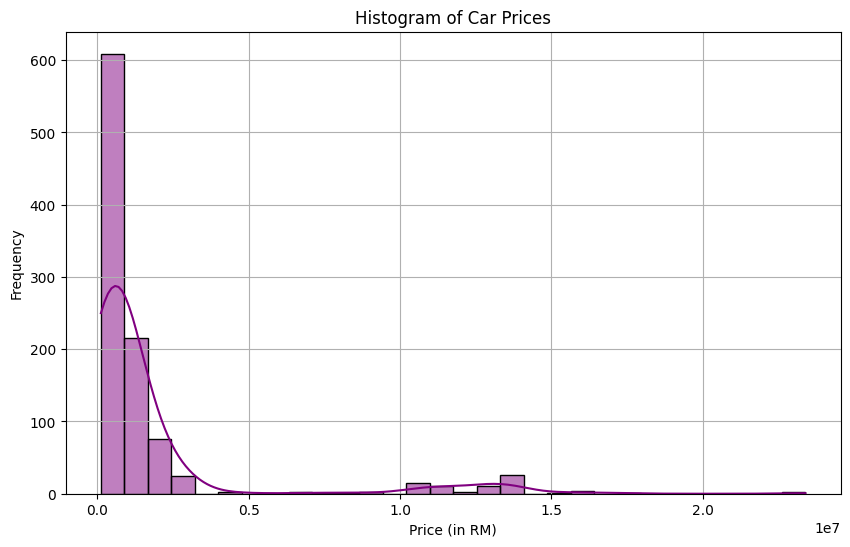

In [49]:
# Box plot showing the distribution of car prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_with_EV, x='Car Make', y='Price (in RM)', hue='Car Make', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Price (in RM)')
plt.show()

# Histogram of car prices
plt.figure(figsize=(10, 6))
sns.histplot(data_with_EV['Price (in RM)'], bins=30, kde=True, color='purple')
plt.title('Histogram of Car Prices')
plt.xlabel('Price (in RM)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [50]:
# Identify non-numeric values in 'Engine Size (L)'
data_with_EV['Engine Size (L)'] = pd.to_numeric(data_with_EV['Engine Size (L)'], errors='coerce')

# Identify non-numeric values in 'Horsepower'
data_with_EV['Horsepower'] = pd.to_numeric(data_with_EV['Horsepower'], errors='coerce')

# Display rows with missing data
print(data_with_EV[data_with_EV.isna().any(axis=1)])


         Car Make  Car Model  Year  Price (in RM)  Engine Size (L)  \
26          Rimac     Nevera  2022     10800000.0              NaN   
37        Porsche  Taycan 4S  2022       468000.0              NaN   
42            BMW         i8  2020       668250.0              NaN   
97          Rimac     Nevera  2022     10800000.0              NaN   
99          Tesla   Roadster  2022       900000.0              NaN   
...           ...        ...   ...            ...              ...   
986         Rimac     Nevera  2022     10800000.0              NaN   
987         Lotus      Evija  2022      9000000.0              NaN   
988   Pininfarina   Battista  2021     11250000.0              NaN   
1003        Lotus      Evija  2021      9000000.0              NaN   
1006        Rimac     Nevera  2021     10800000.0              NaN   

      Horsepower  Torque (Nm)  0-97 km/h Time (seconds)  
26        1914.0   2299.46724                      1.85  
37         562.0   649.436797              

In [51]:
# Drop rows with NaN values
data_with_EV = data_with_EV.dropna(subset=['Engine Size (L)', 'Horsepower'])
data_with_EV

,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
0,Porsche,911,2022,455400.0,3.0,379.0,448.775741,4.0
1,Lamborghini,Huracan,2021,1234755.0,5.2,630.0,600.627351,2.8
2,Ferrari,488 GTB,2022,1501875.0,3.9,661.0,760.613869,3.0
3,Audi,R8,2022,642150.0,5.2,562.0,550.462087,3.2
4,McLaren,720S,2021,1341000.0,4.0,710.0,770.104595,2.7
...,...,...,...,...,...,...,...,...
1000,Aston Martin,Vantage,2021,657000.0,4.0,503.0,684.688064,3.6
1001,Bugatti,Chiron,2021,13500000.0,8.0,1479.0,1599.865179,2.4
1002,Koenigsegg,Jesko,2022,13500000.0,5.0,1280.0,1499.534651,2.5
1004,McLaren,Senna,2021,4500000.0,4.0,789.0,799.932589,2.7


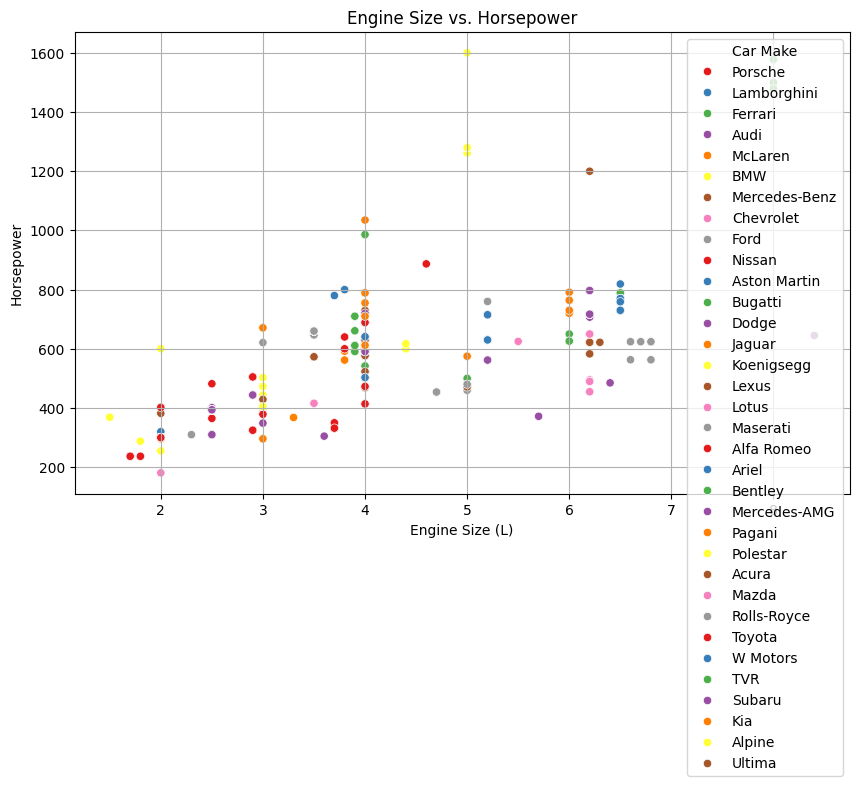

In [52]:
# Scatter plot of Engine Size vs. Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_with_EV, x='Engine Size (L)', y='Horsepower', hue='Car Make', palette='Set1')
plt.title('Engine Size vs. Horsepower')
plt.xlabel('Engine Size (L)')
plt.ylabel('Horsepower')
plt.grid(True)
plt.show()


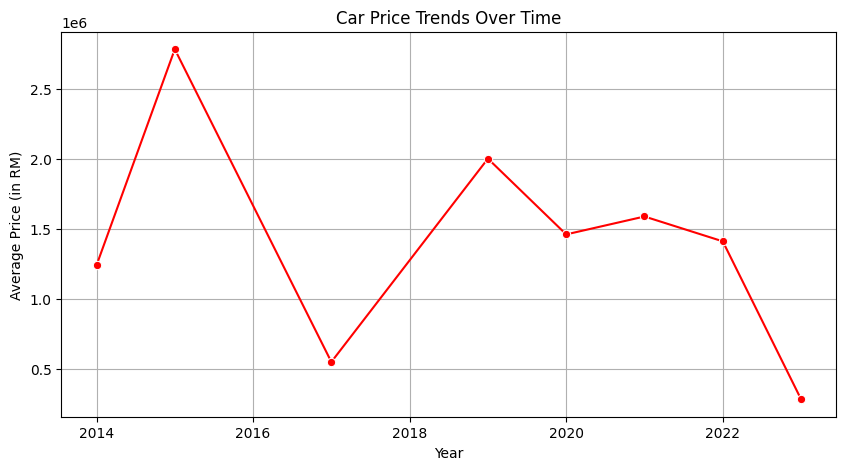

In [53]:
# Average price trend over the years
avg_price_by_year = data_with_EV.groupby('Year')['Price (in RM)'].mean().reset_index()

# Plotting the price trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_price_by_year, x='Year', y='Price (in RM)', marker='o', color='red')
plt.title('Car Price Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price (in RM)')
plt.grid(True)
plt.show()


**Car Price Trends Over Time Analysis**

- The graph titled "Car Price Trends Over Time" illustrates the average car prices (in RM) from 2014 to 2023. 
- The price fluctuations are quite pronounced. 
- In 2014, the average price started at around RM 1.5 million, followed by a significant spike in 2015, reaching its highest point of over RM 2.5 million. 
- However, by 2017, there was a sharp decline, with the price dropping to approximately RM 0.5 million. 
- After this low, prices steadily increased again, peaking in 2018, and then experienced a decline from 2020 onwards, with a particularly steep drop in 2023, where prices fell to their lowest point in the observed period, under RM 0.5 million.
- This suggests a volatile car market over the years, with significant price swings.

C:\Users\tuana\AppData\Local\Temp\ipykernel_10492\2747001169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_EV.loc[:, 'Performance Category'] = pd.cut(data_with_EV['Horsepower'],


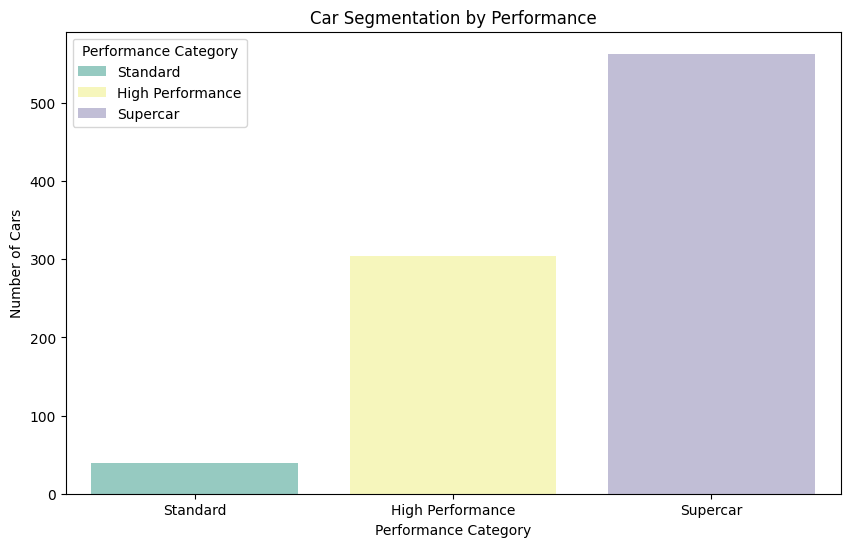

In [54]:
# Categorizing cars based on horsepower using .loc[] to avoid SettingWithCopyWarning
data_with_EV.loc[:, 'Performance Category'] = pd.cut(data_with_EV['Horsepower'],
                                                     bins=[0, 300, 500, 1000],
                                                     labels=['Standard', 'High Performance', 'Supercar'])

# Count plot of cars in each performance category
plt.figure(figsize=(10, 6))
sns.countplot(data=data_with_EV, x='Performance Category', hue='Performance Category', palette='Set3')
plt.title('Car Segmentation by Performance')
plt.xlabel('Performance Category')
plt.ylabel('Number of Cars')
plt.show()



**Car Segmentation by Performance Analysis**

The graph titled "Car Segmentation by Performance" shows the distribution of cars across three 
performance categories based on horsepower: 
- Standard (up to 300 horsepower)
- High Performance (300-500 horsepower)
- Supercar (500-1000 horsepower)

The count plot reveals that the majority of cars in the dataset are classified as Supercars, with over 500 cars in this category. High Performance cars make up the second largest group, with around 300 cars. The Standard category, with the lowest horsepower, has the fewest cars, numbering under 100. This segmentation highlights a larger concentration of high-powered cars in the dataset.

In [58]:
# 1. Check for missing values and convert 'Horsepower' to numerical type (float)
valid_powerful_cars_without_EV = data_without_EV.dropna(subset=['Horsepower'])  # Drop rows with missing horsepower values
valid_powerful_cars_without_EV['Horsepower'] = pd.to_numeric(valid_powerful_cars['Horsepower'], errors='coerce')  # Convert to numeric, handling errors

# 2. Sort by 'Horsepower' in descending order and get the top 10
top_powerful_cars_without_EV = valid_powerful_cars_without_EV.sort_values(by='Horsepower', ascending=False).head(10)

top_powerful_cars_without_EV


,Car Make,Car Model,Year,Price (in RM),Engine Size (L),Horsepower,Torque (Nm),0-97 km/h Time (seconds)
88,Koenigsegg,Jesko,2022,13500000.0,5.0,1600.0,1499.534651,2.5
822,Koenigsegg,Jesko,2022,13500000.0,5.0,1600.0,1499.534651,2.5
161,Koenigsegg,Jesko,2022,13500000.0,5.0,1600.0,1499.534651,2.5
418,Koenigsegg,Jesko Absolut,2022,12600000.0,5.0,1600.0,1499.534651,2.1
541,Bugatti,Chiron Super Sport 300+,2022,23400000.0,8.0,1578.0,1599.865179,2.3
823,Bugatti,Chiron Super Sport 300+,2021,23400000.0,8.0,1578.0,1599.865179,2.4
434,Bugatti,Chiron,2022,13500000.0,8.0,1500.0,1599.865179,2.4
499,Bugatti,Chiron,2022,13500000.0,8.0,1500.0,1599.865179,2.3
113,Bugatti,Chiron,2021,13500000.0,8.0,1500.0,1599.865179,2.4
683,Bugatti,Chiron,2022,13500000.0,8.0,1500.0,1599.865179,2.4


In [59]:
# Assuming 'valid_powerful_cars' is the DataFrame containing the horsepower data
# Sort the DataFrame by 'Horsepower' in descending order to get the top cars with highest horsepower
top_powerful_cars_without_EV = valid_powerful_cars_without_EV.sort_values(by='Horsepower', ascending=False).head(10)
top_powerful_cars_without_EV[['Car Make', 'Car Model', 'Horsepower']].head(10)


,Car Make,Car Model,Horsepower
88,Koenigsegg,Jesko,1600.0
822,Koenigsegg,Jesko,1600.0
161,Koenigsegg,Jesko,1600.0
418,Koenigsegg,Jesko Absolut,1600.0
541,Bugatti,Chiron Super Sport 300+,1578.0
823,Bugatti,Chiron Super Sport 300+,1578.0
434,Bugatti,Chiron,1500.0
499,Bugatti,Chiron,1500.0
113,Bugatti,Chiron,1500.0
683,Bugatti,Chiron,1500.0


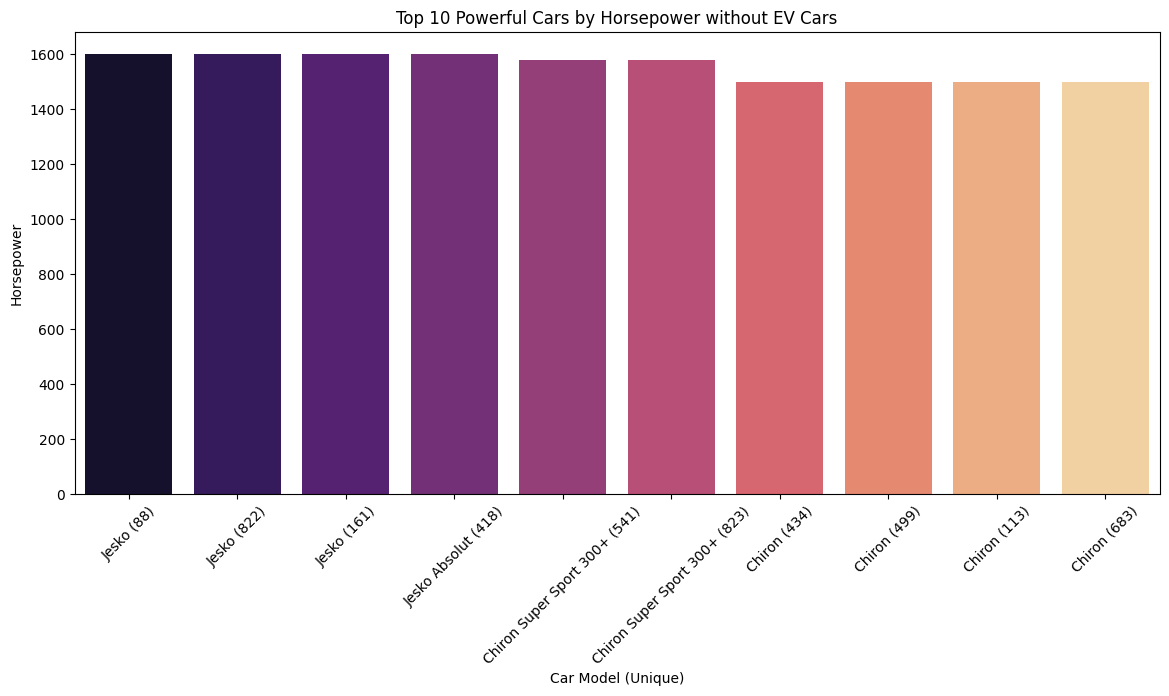

In [60]:
# Create a unique label for each car by combining model and index to avoid grouping
top_powerful_cars_without_EV['Index'] = top_powerful_cars_without_EV.index.astype(str)
top_powerful_cars_without_EV['Unique Label'] = valid_powerful_cars_without_EV['Car Model'] + ' (' + top_powerful_cars_without_EV['Index'] + ')'

# Create the figure
plt.figure(figsize=(14, 6))

sns.barplot(data=top_powerful_cars_without_EV, x='Unique Label', y='Horsepower', palette='magma', hue='Unique Label', dodge=False)
plt.title('Top 10 Powerful Cars by Horsepower without EV Cars')
plt.xlabel('Car Model (Unique)')
plt.ylabel('Horsepower')

plt.xticks(rotation=45)
plt.show()

In [62]:
# Assuming you have your DataFrame 'data_with_EV' loaded

# 1. Check for missing values and convert '0-97 km/h Time (seconds)' to numerical type (float)
valid_fastest_cars = data_with_EV.dropna(subset=['0-97 km/h Time (seconds)'])
valid_fastest_cars['0-97 km/h Time (seconds)'] = pd.to_numeric(valid_fastest_cars['0-97 km/h Time (seconds)'], errors='coerce')

# 2. Sort by '0-97 km/h Time (seconds)' in ascending order (faster times first)
valid_fastest_cars = valid_fastest_cars.sort_values(by='0-97 km/h Time (seconds)', ascending=True)

# 3. Get the number of valid entries and optionally display the DataFrame
number_of_fastest_cars = len(valid_fastest_cars)
print(f"Number of cars with valid 0-97 km/h times: {number_of_fastest_cars}")

# Optional: Display the top 10 fastest cars (modify the number as needed)
top_10_fastest_cars = valid_fastest_cars.head(10)
print(top_10_fastest_cars)

Number of cars with valid 0-97 km/h times: 945
       Car Make                Car Model  Year  Price (in RM)  \
418  Koenigsegg            Jesko Absolut  2022     12600000.0   
688     Porsche               918 Spyder  2015      8100000.0   
541     Bugatti  Chiron Super Sport 300+  2022     23400000.0   
514      Ultima                       RS  2021       990000.0   
519     Bugatti                   Chiron  2021     13500000.0   
624     Bugatti         Chiron Pur Sport  2021     16195500.0   
206     Bugatti                   Chiron  2021     13500000.0   
499     Bugatti                   Chiron  2022     13500000.0   
303     Bugatti                   Chiron  2021     13491000.0   
683     Bugatti                   Chiron  2022     13500000.0   

     Engine Size (L)  Horsepower  Torque (Nm)  0-97 km/h Time (seconds)  \
418              5.0      1600.0  1499.534651                       2.1   
688              4.6       887.0  1279.892143                       2.2   
541         

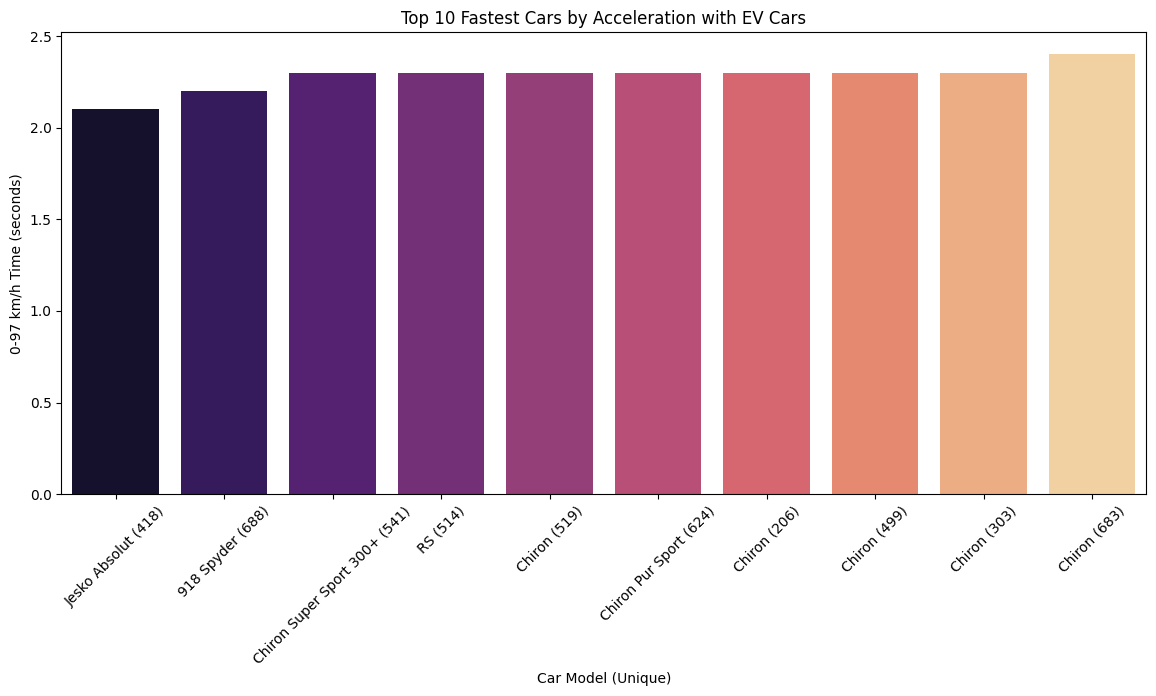

In [64]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
top_10_fastest_cars_copy = top_10_fastest_cars.copy()

# Create a unique label for each car by combining model and index to avoid grouping
top_10_fastest_cars_copy.loc[:, 'Unique Label'] = top_10_fastest_cars_copy['Car Model'] + ' (' + top_10_fastest_cars_copy.index.astype(str) + ')'

# Plotting top 10 fastest cars with unique labels
plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_fastest_cars_copy, x='Unique Label', y='0-97 km/h Time (seconds)', palette='magma', hue='Unique Label', dodge=False)
plt.title('Top 10 Fastest Cars by Acceleration with EV Cars')
plt.xlabel('Car Model (Unique)')
plt.ylabel('0-97 km/h Time (seconds)')
plt.xticks(rotation=45)
plt.show()


In [66]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
data_without_EV_copy = data_without_EV.copy()

# Check for missing values and convert '0-97 km/h Time (seconds)' to numeric
data_without_EV_copy.dropna(subset=['0-97 km/h Time (seconds)'], inplace=True)
data_without_EV_copy['0-97 km/h Time (seconds)'] = pd.to_numeric(data_without_EV_copy['0-97 km/h Time (seconds)'], errors='coerce')

# Sort by '0-97 km/h Time (seconds)' in ascending order
data_without_EV_copy = data_without_EV_copy.sort_values(by='0-97 km/h Time (seconds)', ascending=True)

# Get the number of valid entries and optionally display the DataFrame
number_of_fastest_cars_withoutEV = data_without_EV_copy.shape[0]
print(f"Number of cars with valid 0-97 km/h times: {number_of_fastest_cars_withoutEV}")

# Optional: Display the top 10 fastest cars (modify the number as needed)
top_10_fastest_cars_withoutEV = data_without_EV_copy.head(10)
print(top_10_fastest_cars_withoutEV)


Number of cars with valid 0-97 km/h times: 945
        Car Make                Car Model  Year  Price (in RM)  \
418   Koenigsegg            Jesko Absolut  2022     12600000.0   
688      Porsche               918 Spyder  2015      8100000.0   
303      Bugatti                   Chiron  2021     13491000.0   
499      Bugatti                   Chiron  2022     13500000.0   
541      Bugatti  Chiron Super Sport 300+  2022     23400000.0   
514       Ultima                       RS  2021       990000.0   
519      Bugatti                   Chiron  2021     13500000.0   
624      Bugatti         Chiron Pur Sport  2021     16195500.0   
206      Bugatti                   Chiron  2021     13500000.0   
1001     Bugatti                   Chiron  2021     13500000.0   

      Engine Size (L)  Horsepower  Torque (Nm)  0-97 km/h Time (seconds)  
418               5.0      1600.0  1499.534651                       2.1  
688               4.6       887.0  1279.892143                       2.2  
3

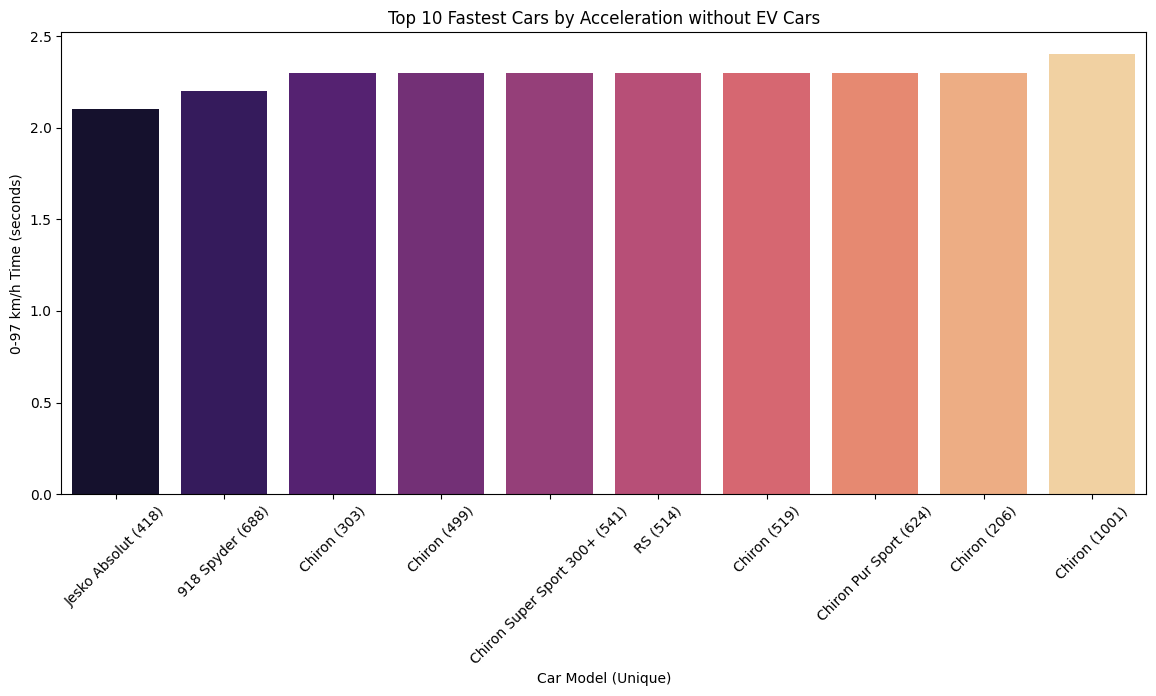

In [68]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
top_10_fastest_cars_withoutEV_copy = top_10_fastest_cars_withoutEV.copy()

# Create a unique label for each car by combining model and index to avoid grouping
top_10_fastest_cars_withoutEV_copy.loc[:, 'Unique Label'] = top_10_fastest_cars_withoutEV_copy['Car Model'] + ' (' + top_10_fastest_cars_withoutEV_copy.index.astype(str) + ')'

# Plotting top 10 fastest cars with unique labels
plt.figure(figsize=(14, 6))
sns.barplot(data=top_10_fastest_cars_withoutEV_copy, x='Unique Label', y='0-97 km/h Time (seconds)', palette='magma', hue='Unique Label', dodge=False)
plt.title('Top 10 Fastest Cars by Acceleration without EV Cars')
plt.xlabel('Car Model (Unique)')
plt.ylabel('0-97 km/h Time (seconds)')
plt.xticks(rotation=45)
plt.show()


### Price Statistic

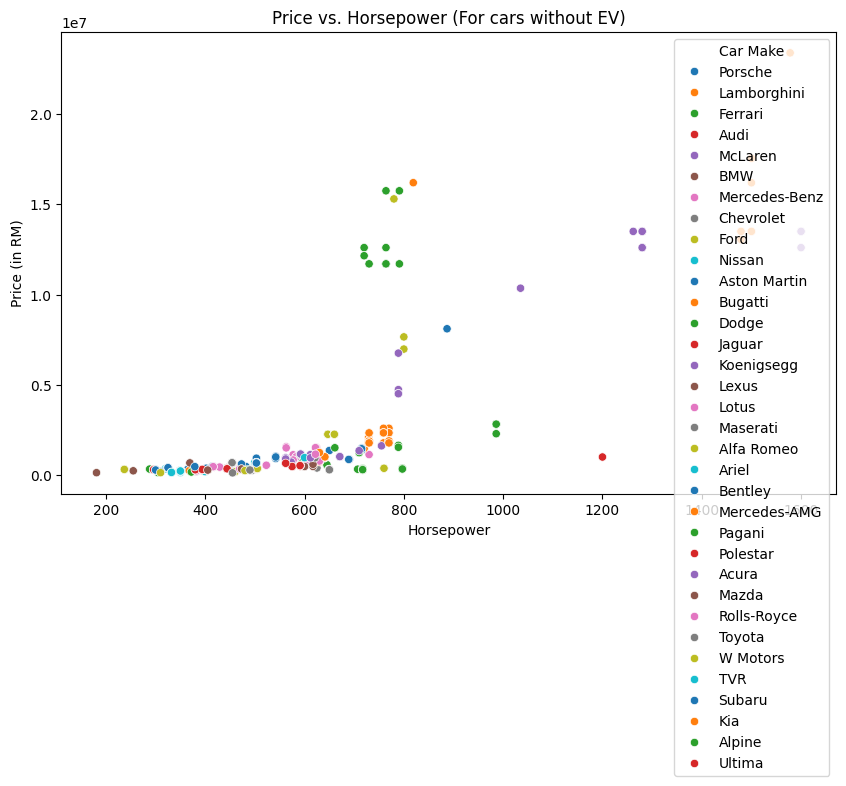

In [69]:
# Filter out rows with "EV" in Horsepower
data_without_EV_horsepower = data_with_EV[data_with_EV['Horsepower'] != 'EV']

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_without_EV_horsepower, x='Horsepower', y='Price (in RM)', hue='Car Make', palette='tab10')
plt.title('Price vs. Horsepower (For cars without EV)')
plt.xlabel('Horsepower')
plt.show()

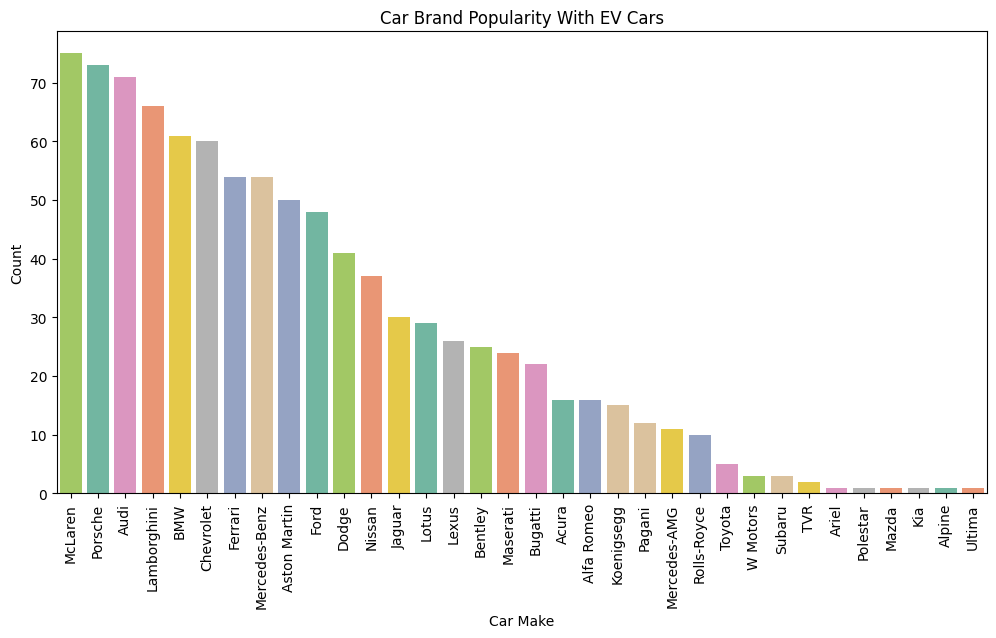

In [70]:
# Count plot showing the distribution of car brands
plt.figure(figsize=(12, 6))
sns.countplot(data=data_with_EV, x='Car Make', hue='Car Make', order=data_with_EV['Car Make'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.title('Car Brand Popularity With EV Cars')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()


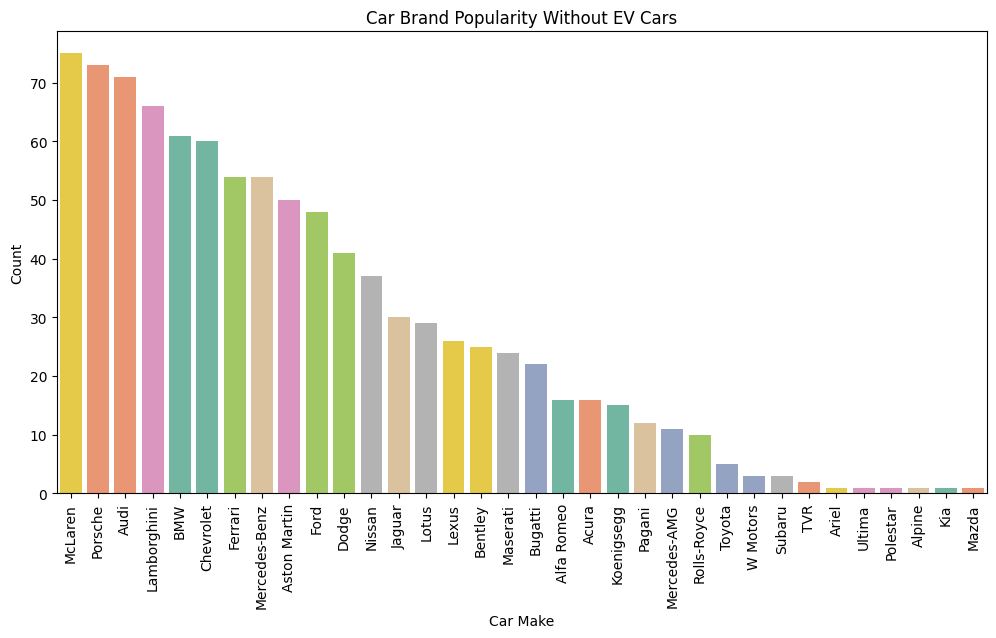

In [71]:
# Count plot showing the distribution of car brands
plt.figure(figsize=(12, 6))
sns.countplot(data=data_without_EV, x='Car Make', hue='Car Make', order=data_without_EV['Car Make'].value_counts().index, palette='Set2')
plt.xticks(rotation=90)
plt.title('Car Brand Popularity Without EV Cars')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()


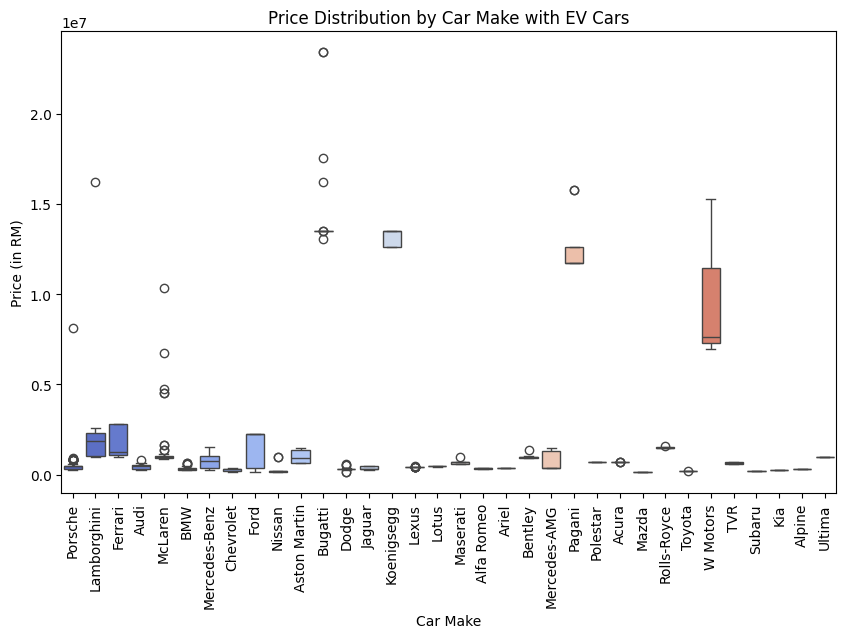

In [72]:
# Box plot showing the distribution of car prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_with_EV, x='Car Make', y='Price (in RM)', hue='Car Make', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Make with EV Cars')
plt.xlabel('Car Make')
plt.ylabel('Price (in RM)')
plt.show()


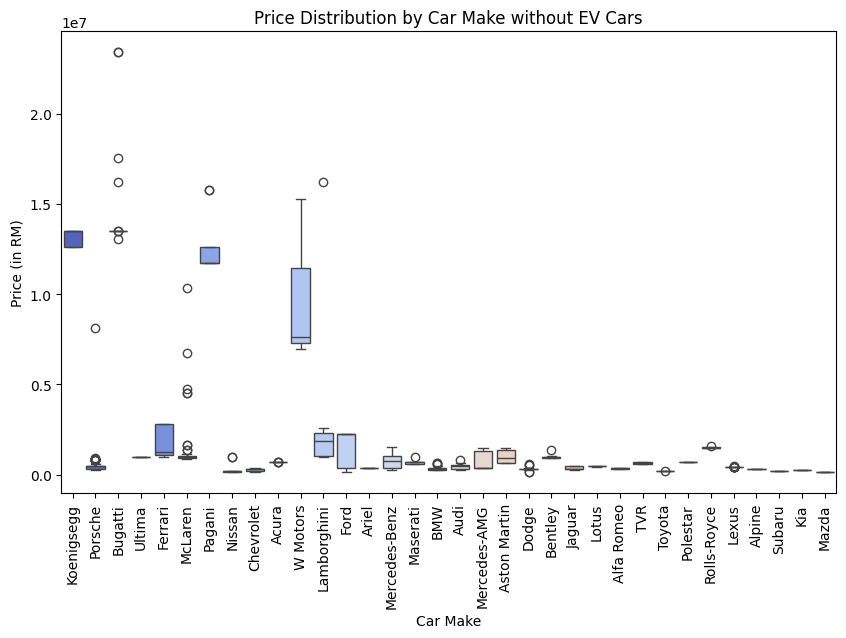

In [73]:
# Box plot showing the distribution of car prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_without_EV, x='Car Make', y='Price (in RM)', hue='Car Make', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Price Distribution by Car Make without EV Cars')
plt.xlabel('Car Make')
plt.ylabel('Price (in RM)')
plt.show()

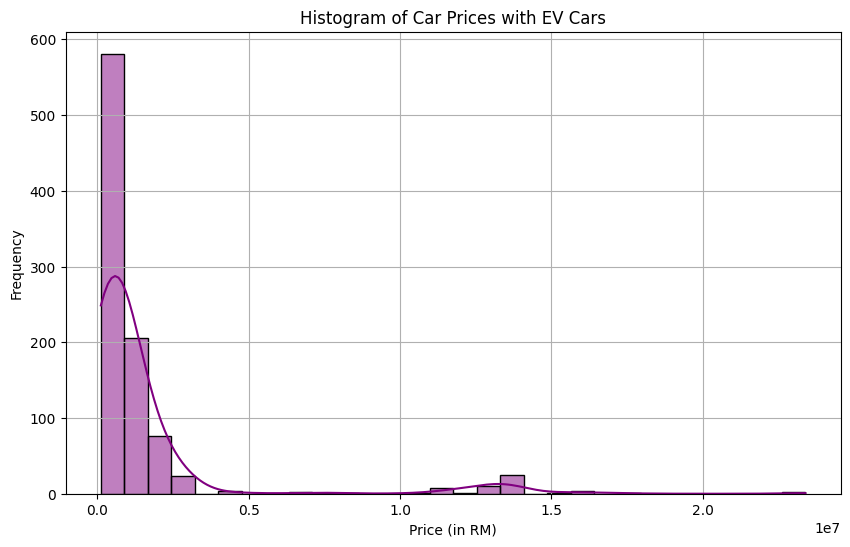

In [74]:
# Histogram of car prices
plt.figure(figsize=(10, 6))
sns.histplot(data_with_EV['Price (in RM)'], bins=30, kde=True, color='purple')
plt.title('Histogram of Car Prices with EV Cars')
plt.xlabel('Price (in RM)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

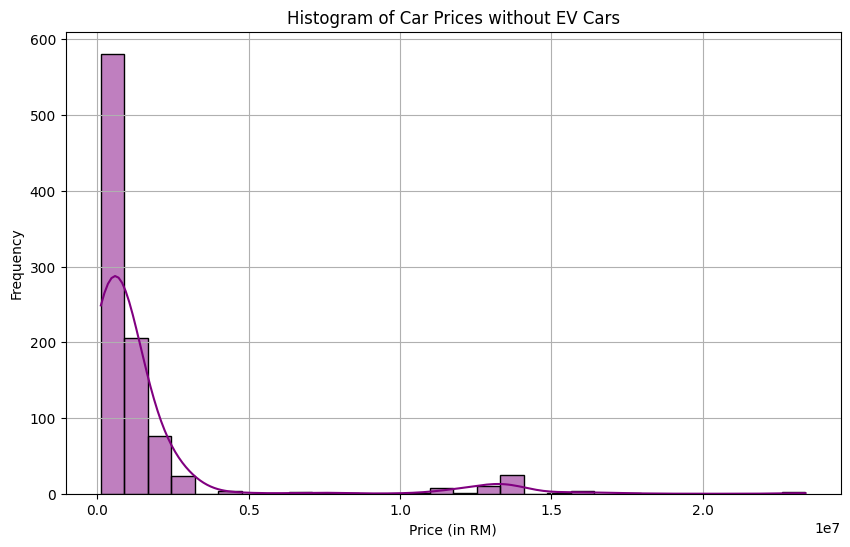

In [75]:
# Histogram of car prices
plt.figure(figsize=(10, 6))
sns.histplot(data_without_EV['Price (in RM)'], bins=30, kde=True, color='purple')
plt.title('Histogram of Car Prices without EV Cars')
plt.xlabel('Price (in RM)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

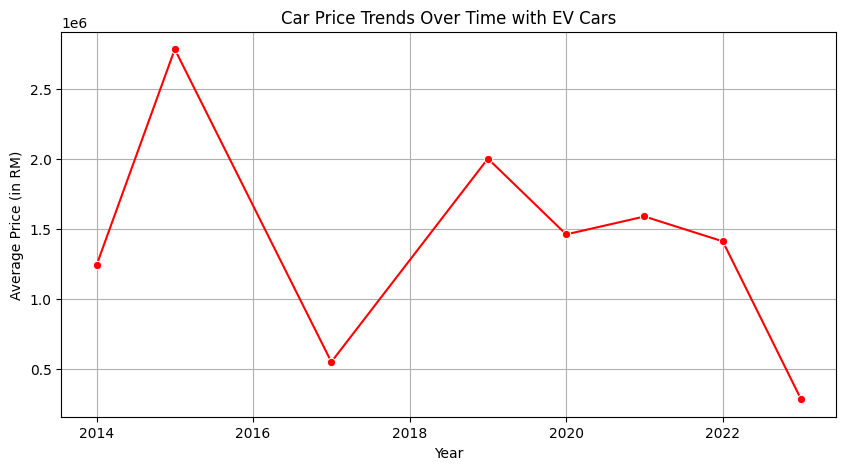

In [76]:
# Average price trend over the years
avg_price_by_year = data_with_EV.groupby('Year')['Price (in RM)'].mean().reset_index()

# Plotting the price trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_price_by_year, x='Year', y='Price (in RM)', marker='o', color='red')
plt.title('Car Price Trends Over Time with EV Cars')
plt.xlabel('Year')
plt.ylabel('Average Price (in RM)')
plt.grid(True)
plt.show()


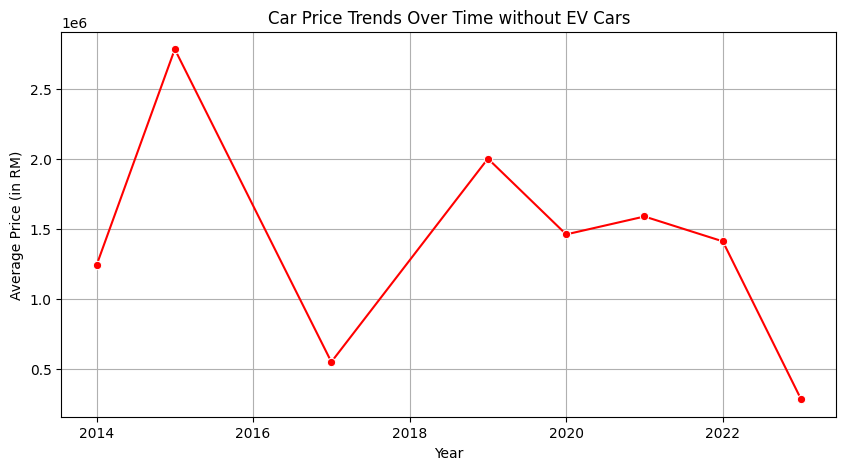

In [77]:
# Average price trend over the years
avg_price_by_year = data_without_EV.groupby('Year')['Price (in RM)'].mean().reset_index()

# Plotting the price trend
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_price_by_year, x='Year', y='Price (in RM)', marker='o', color='red')
plt.title('Car Price Trends Over Time without EV Cars')
plt.xlabel('Year')
plt.ylabel('Average Price (in RM)')
plt.grid(True)
plt.show()
